In [1]:
import math
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
def assignLabels(values):
    label=[]
    for i in (values):
        if i<25:
            label.append('u')
        elif i>75:
             label.append('o')
        else:
             label.append('n')
    return label

In [3]:
df = pd.read_csv("h1.csv")
dataset = df[df.columns[[4]]].values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=100, batch_size=70, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

model.summary()

Epoch 1/100
99/99 [==============================] - 1s 12ms/step - loss: 0.0198 - val_loss: 0.0442
Epoch 2/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0281
Epoch 3/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0083 - val_loss: 0.0412
Epoch 4/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0094 - val_loss: 0.0689
Epoch 5/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.0830
Epoch 6/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0158 - val_loss: 0.0265
Epoch 7/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.0310
Epoch 8/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0255
Epoch 9/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0323
Epoch 10/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0077 - val_loss: 0.0200
Epoch 11

Epoch 83/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0169
Epoch 84/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.0131
Epoch 85/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0145
Epoch 86/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0032 - val_loss: 0.0135
Epoch 87/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0151
Epoch 88/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0034 - val_loss: 0.0130
Epoch 89/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0025 - val_loss: 0.0153
Epoch 90/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0033 - val_loss: 0.0132
Epoch 91/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0026 - val_loss: 0.0173
Epoch 92/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0035 - val_loss: 0.0134


In [5]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
trainError = mean_absolute_error(Y_train[0], train_predict[:,0])
testError = mean_absolute_error(Y_test[0], test_predict[:,0])
#print(trainError**0.5)
#print(testError**0.5)


In [6]:
print(trainError**0.5)
print(testError**0.5)

1.1257179018278318
1.992212421062631


In [7]:
trueLabels=assignLabels(Y_test[0])
predLabels=assignLabels(test_predict[:,0])

In [8]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(trueLabels,predLabels)
acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

Overall accuracy: 96.40330188679245 %


No handles with labels found to put in legend.


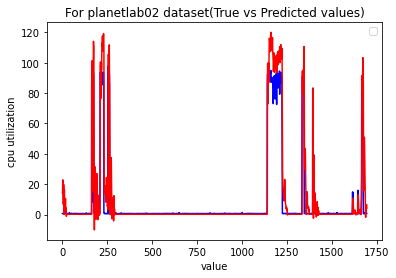

In [9]:
from matplotlib import pyplot
pyplot.xlabel('value')
pyplot.ylabel('cpu utilization')
pyplot.title('For planetlab02 dataset(True vs Predicted values)')
pyplot.plot(Y_test[0],color='blue')
pyplot.plot(test_predict, color='red')
pyplot.legend()
pyplot.show()

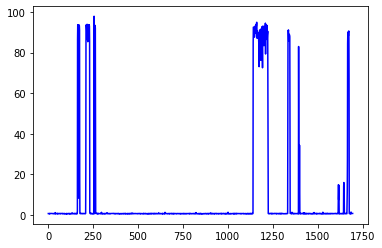

In [10]:
pyplot.plot(Y_test[0],color='blue')